# Notebook to seperate multinucleated data based on hashtags

**Created by :** Srivalli Kolla

**Created on :** 06 March, 2025

**Modified on :** 07 March, 2025

**University of Würzburg**

Env : scanpy (Python 3.12.2)

# Importing Packages

In [201]:
import scanpy as sc
import pandas as pd
import datetime
import os
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

In [202]:
sc.settings.verbosity = 3
sc.logging.print_versions()

plt.rcParams['figure.dpi'] = 300  
plt.rcParams['savefig.dpi'] = 300
plt.vlines

timestamp = datetime.datetime.now().strftime("%d_%m_%y")

-----
anndata     0.11.3
scanpy      1.10.4
-----
Cython              3.0.12
PIL                 11.1.0
asttokens           NA
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython              3.0.12
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.12
decorator           5.2.1
executing           2.1.0
h5py                3.13.0
ipykernel           6.29.5
jedi                0.19.2
joblib              1.4.2
kiwisolver          1.4.7
legacy_api_wrap     NA
llvmlite            0.44.0
matplotlib          3.10.1
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.61.0
numpy               2.1.3
packaging           24.2
pandas              2.2.3
parso               0.8.4
patsy               1.0.1
platformdirs        4.3.6
prompt_toolkit      3.0.50
psutil              7.0.0
pure_eval           0.2.3
pydev_ipython       NA
pydevconsole        NA
pydevd              3.2.3
pydevd_file_uti

# Importing files

In [203]:
file_path = '../data/cellbender_processed_data/0.01_full/cb_0.01_full_with_hashtags_05_03_25.h5ad'
raw_adata = sc.read_h5ad(file_path)
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'hto_counts'

In [204]:
raw_adata.obs

,assigned_hashtag
TACCCATTCGAACGCT-1,TotalSeqB7
TACTCATCACCAGGAC-1,TotalSeqB7
GCTGCGATCCGCCAGA-1,TotalSeqB3
TGCCGTTCATGAATGC-1,TotalSeqB7
ATCGTTGAGGATCTAT-1,TotalSeqB4
...,...
GTGCGGTCAATCCGTC-1,TotalSeqB3
GCCAATATCCCCTGAC-1,TotalSeqB4
GTCCTATTCGCGAATC-1,TotalSeqB1
AGTGATCCAAAGGTTC-1,TotalSeqB6


In [205]:
raw_adata.obs['assigned_hashtag'].unique()

['TotalSeqB7', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB8', 'TotalSeqB1', 'TotalSeqB9', 'TotalSeqB6']
Categories (8, object): ['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9']

In [206]:
raw_adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,NA
Gm1992,ENSMUSG00000089699,Gene Expression,NA
Gm19938,ENSMUSG00000102331,Gene Expression,NA
Gm37381,ENSMUSG00000102343,Gene Expression,NA
Rp1,ENSMUSG00000025900,Gene Expression,NA
...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA
TotalSeqB6,Hash6,Antibody Capture,NA
TotalSeqB7,Hash7,Antibody Capture,NA
TotalSeqB8,Hash8,Antibody Capture,NA


# Adding Metadata

In [207]:
metadata = pd.read_csv('../data/Nuclei_hashing_metadata.csv', sep = ';')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,assigned_hashtag
0,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,Hash1
1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard,Hash9
2,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,Hash3
3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,Hash4
4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads,Hash5
5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,Hash6
6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,Hash7
7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard,Hash8


In [208]:
metadata = metadata.set_index('assigned_hashtag')
metadata

,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
assigned_hashtag,,,,,,,
Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
Hash9,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11,11,26-2457,Male,MCMV,TotalSeqB9,Standard
Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
Hash5,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14,14,9_4893,Female,noninf,TotalSeqB5,Magnetic Beads
Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard
Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
Hash8,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17,17,20_2418,Female,noninf,TotalSeqB8,Standard


Modifiying the assigned_hashtag names to match the metadata

In [209]:
raw_adata.obs['assigned_hashtag'] = raw_adata.obs['assigned_hashtag'].str.replace('TotalSeqB', 'Hash')
raw_adata.obs

,assigned_hashtag
TACCCATTCGAACGCT-1,Hash7
TACTCATCACCAGGAC-1,Hash7
GCTGCGATCCGCCAGA-1,Hash3
TGCCGTTCATGAATGC-1,Hash7
ATCGTTGAGGATCTAT-1,Hash4
...,...
GTGCGGTCAATCCGTC-1,Hash3
GCCAATATCCCCTGAC-1,Hash4
GTCCTATTCGCGAATC-1,Hash1
AGTGATCCAAAGGTTC-1,Hash6


In [210]:
raw_adata.obs = raw_adata.obs.join(metadata, on="assigned_hashtag", how="left")

raw_adata.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads
GCCAATATCCCCTGAC-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads
GTCCTATTCGCGAATC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard
AGTGATCCAAAGGTTC-1,Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard


# QC check

In [211]:
raw_adata.var['mt'] = raw_adata.var_names.str.startswith('mt-') 
raw_adata.var['ribo'] = raw_adata.var_names.str.startswith(("Rps","Rpl"))
raw_adata.var

,gene_ids,feature_types,genome,mt,ribo
Xkr4,ENSMUSG00000051951,Gene Expression,NA,False,False
Gm1992,ENSMUSG00000089699,Gene Expression,NA,False,False
Gm19938,ENSMUSG00000102331,Gene Expression,NA,False,False
Gm37381,ENSMUSG00000102343,Gene Expression,NA,False,False
Rp1,ENSMUSG00000025900,Gene Expression,NA,False,False
...,...,...,...,...,...
TotalSeqB5,Hash5,Antibody Capture,NA,False,False
TotalSeqB6,Hash6,Antibody Capture,NA,False,False
TotalSeqB7,Hash7,Antibody Capture,NA,False,False
TotalSeqB8,Hash8,Antibody Capture,NA,False,False


In [212]:
ribo_counts = raw_adata.var['ribo'].value_counts()

mt_counts = raw_adata.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 32192
True: 101

Counts of Mitochondrial (mt) Genes:
False: 32280
True: 13


### Calculating QC metrics per cell

In [213]:
sc.pp.calculate_qc_metrics(raw_adata, qc_vars = ['mt','ribo'], percent_top = None, log1p = False, inplace = True)
raw_adata

AnnData object with n_obs × n_vars = 11525 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'hto_counts'

### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

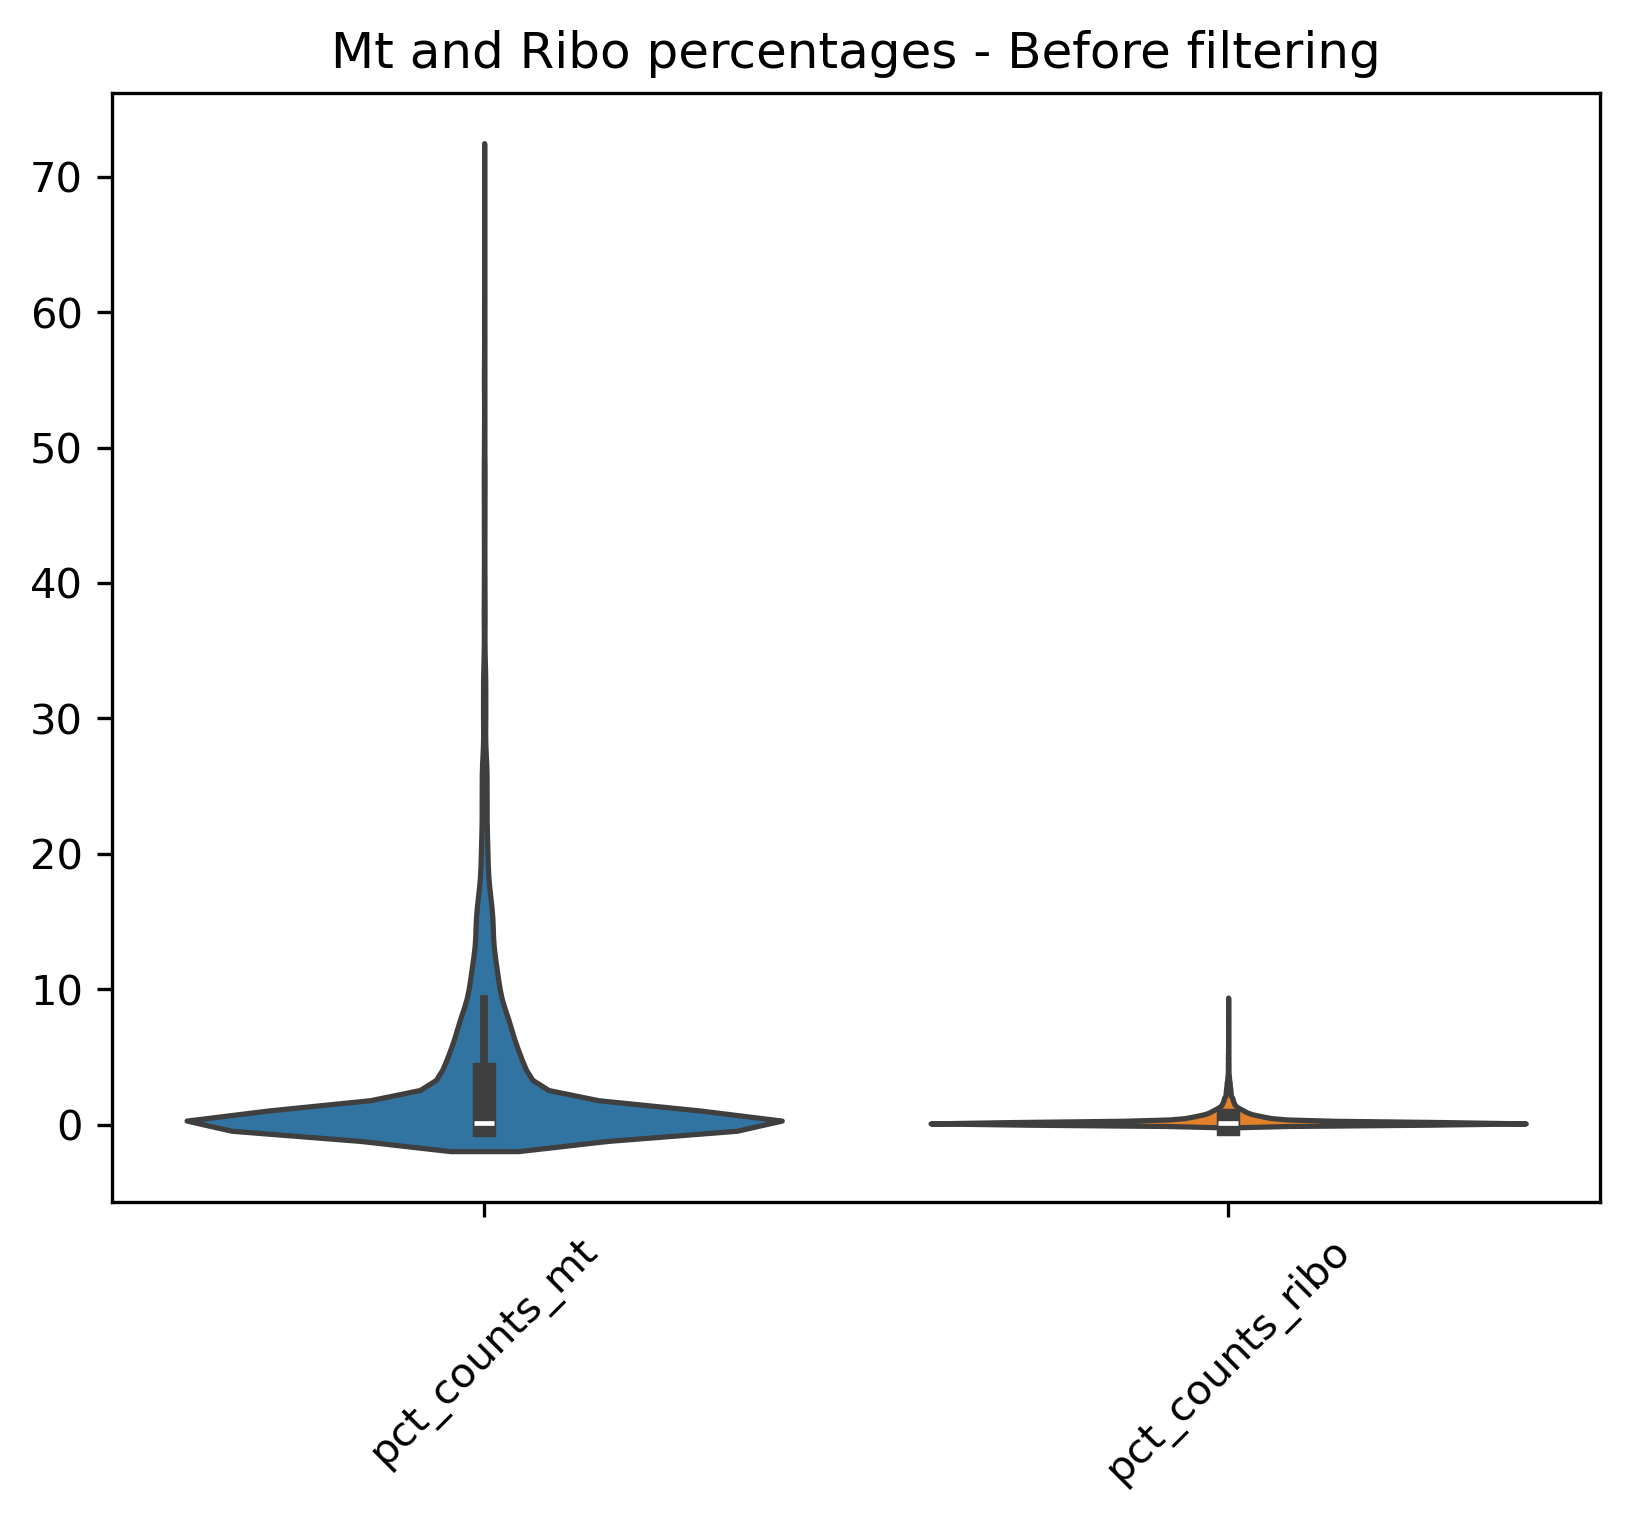

In [214]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=raw_adata.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

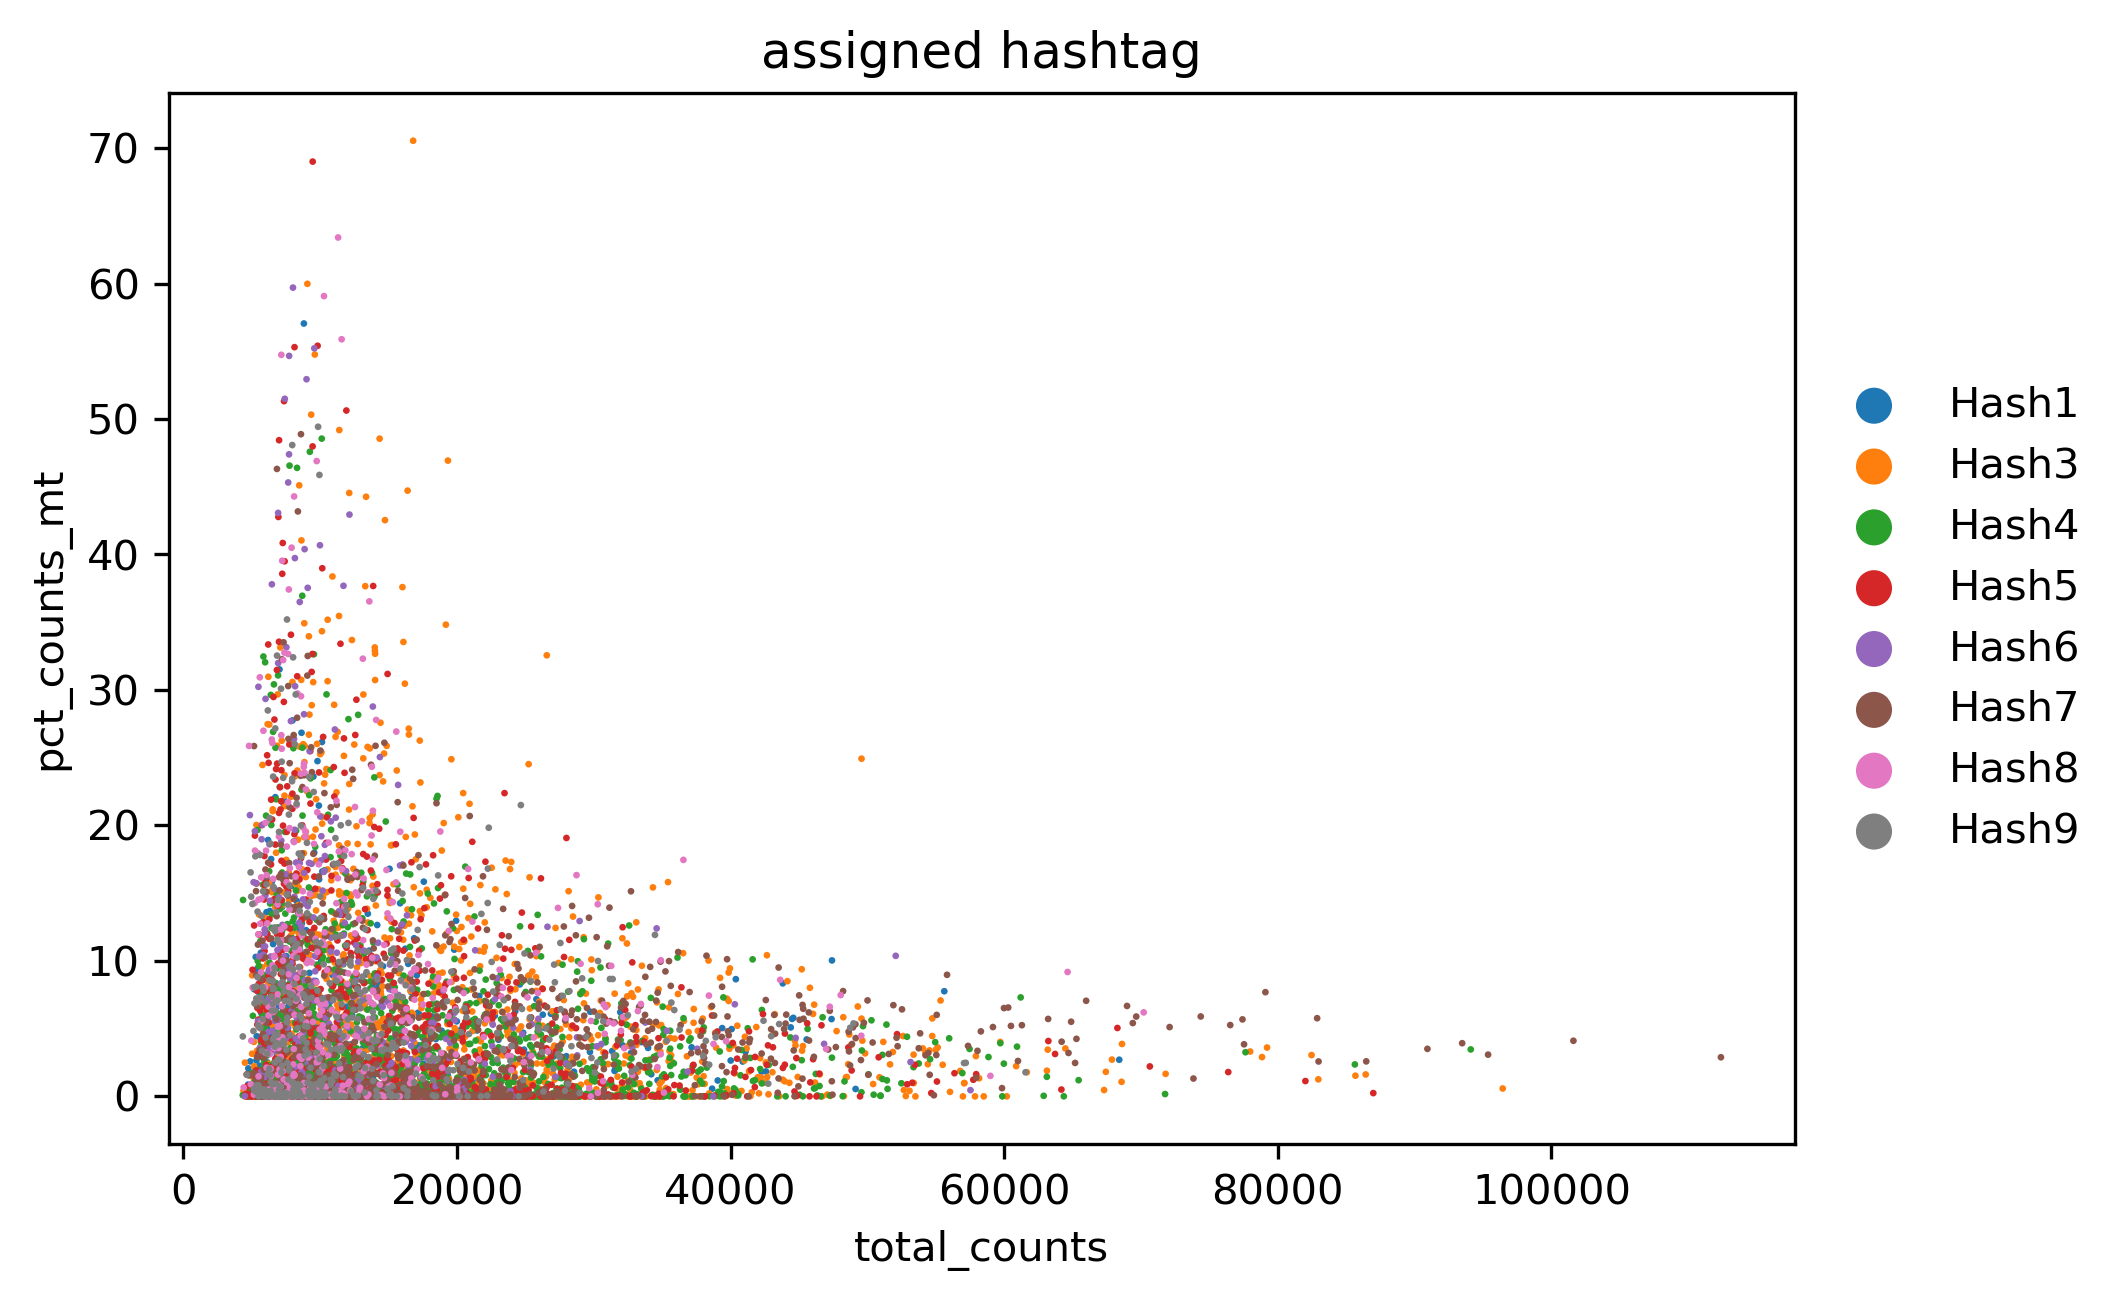

In [215]:
sc.pl.scatter(raw_adata, x = 'total_counts', y = 'pct_counts_mt', color= 'assigned_hashtag')

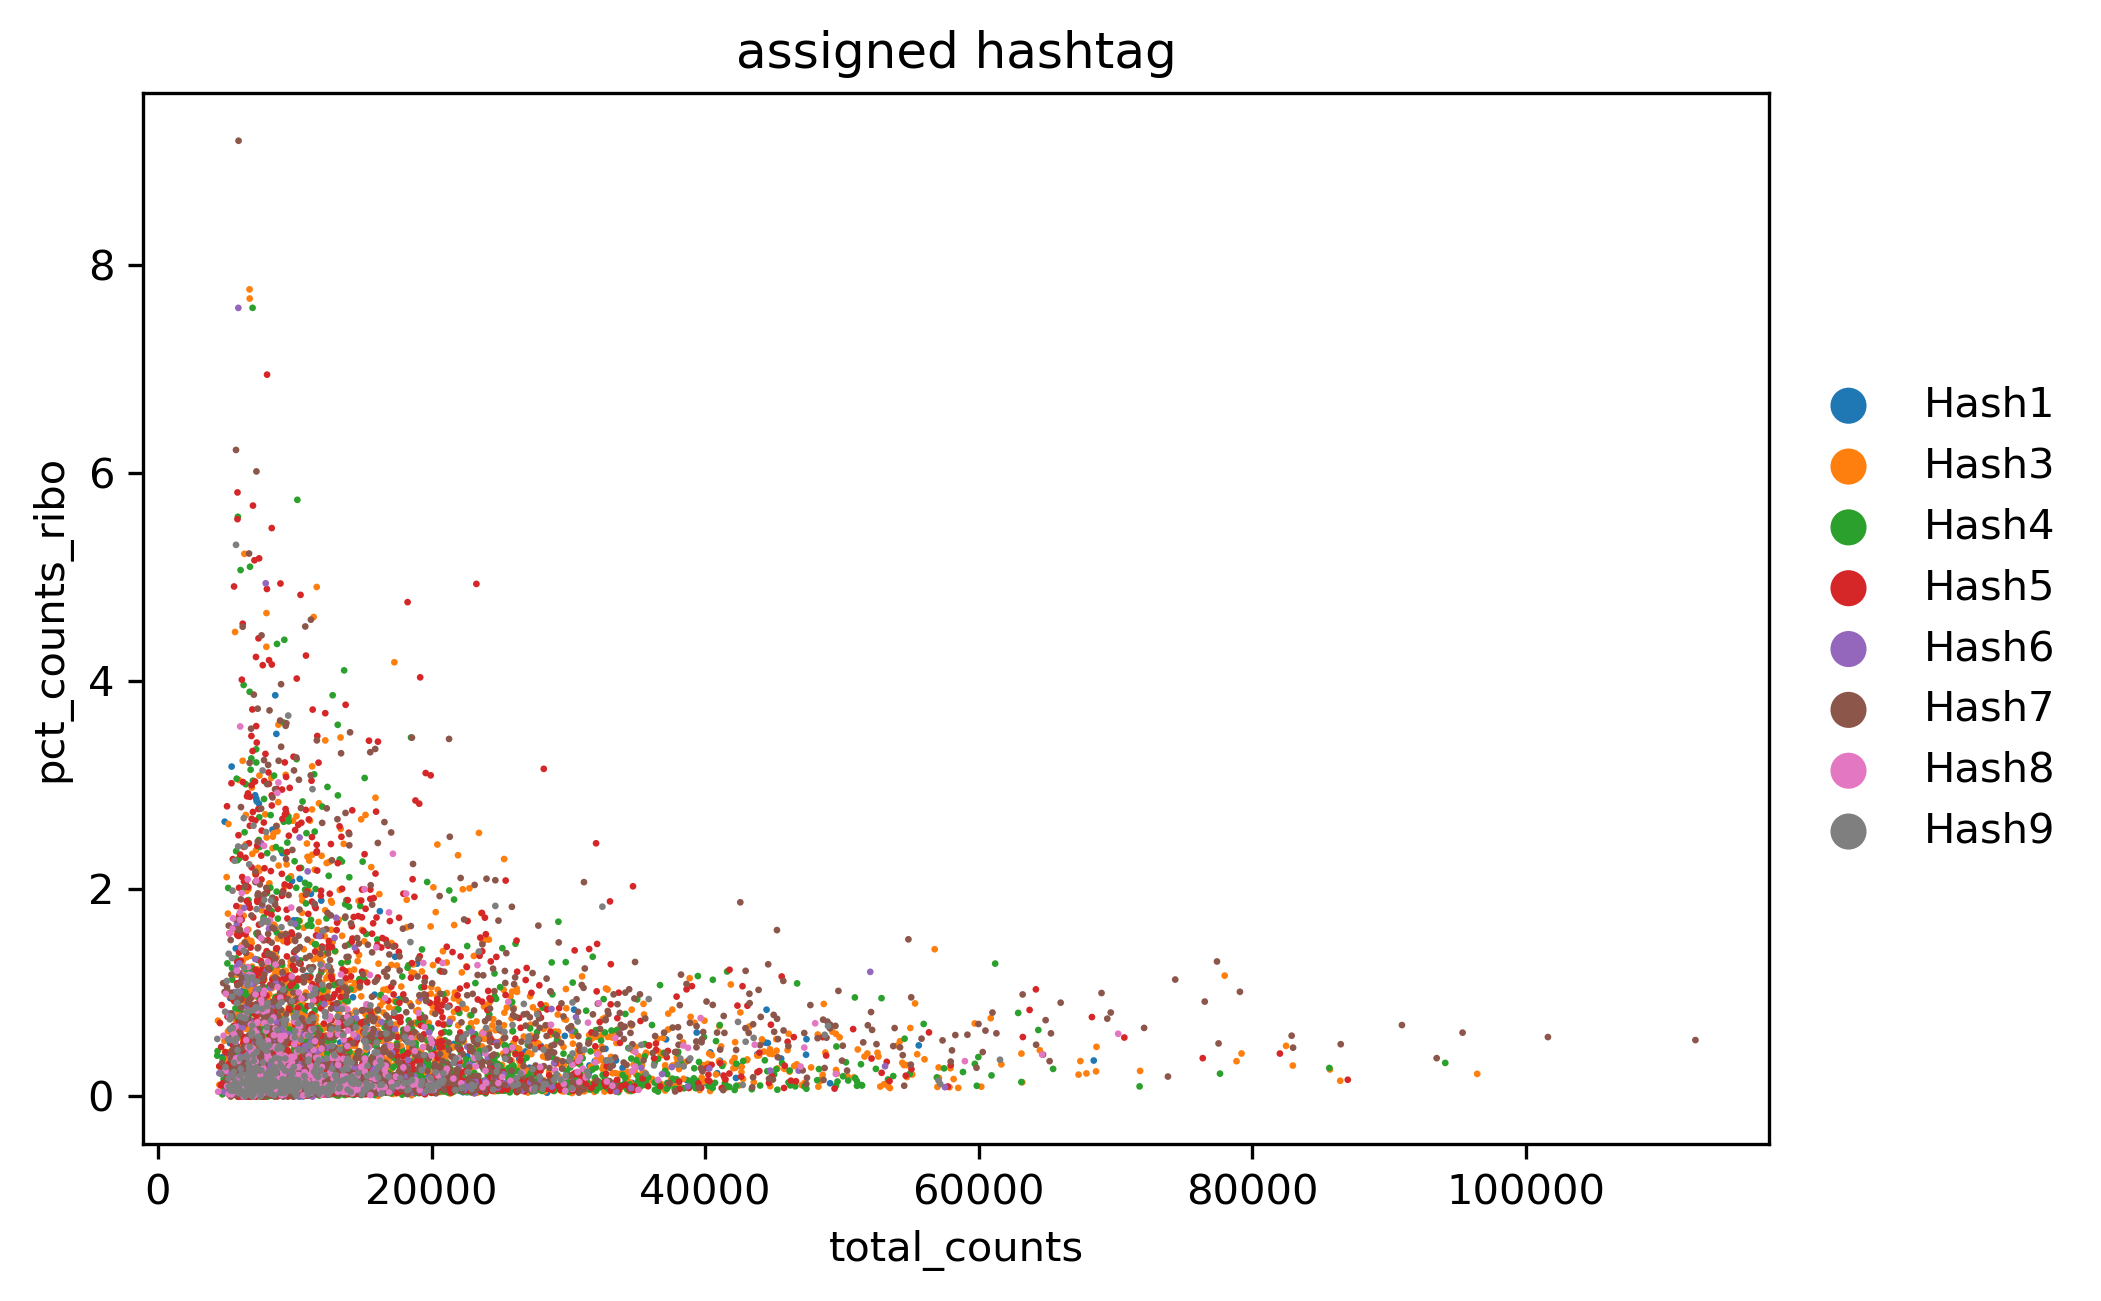

In [216]:
sc.pl.scatter(raw_adata, x = 'total_counts', y = 'pct_counts_ribo',color= 'assigned_hashtag')

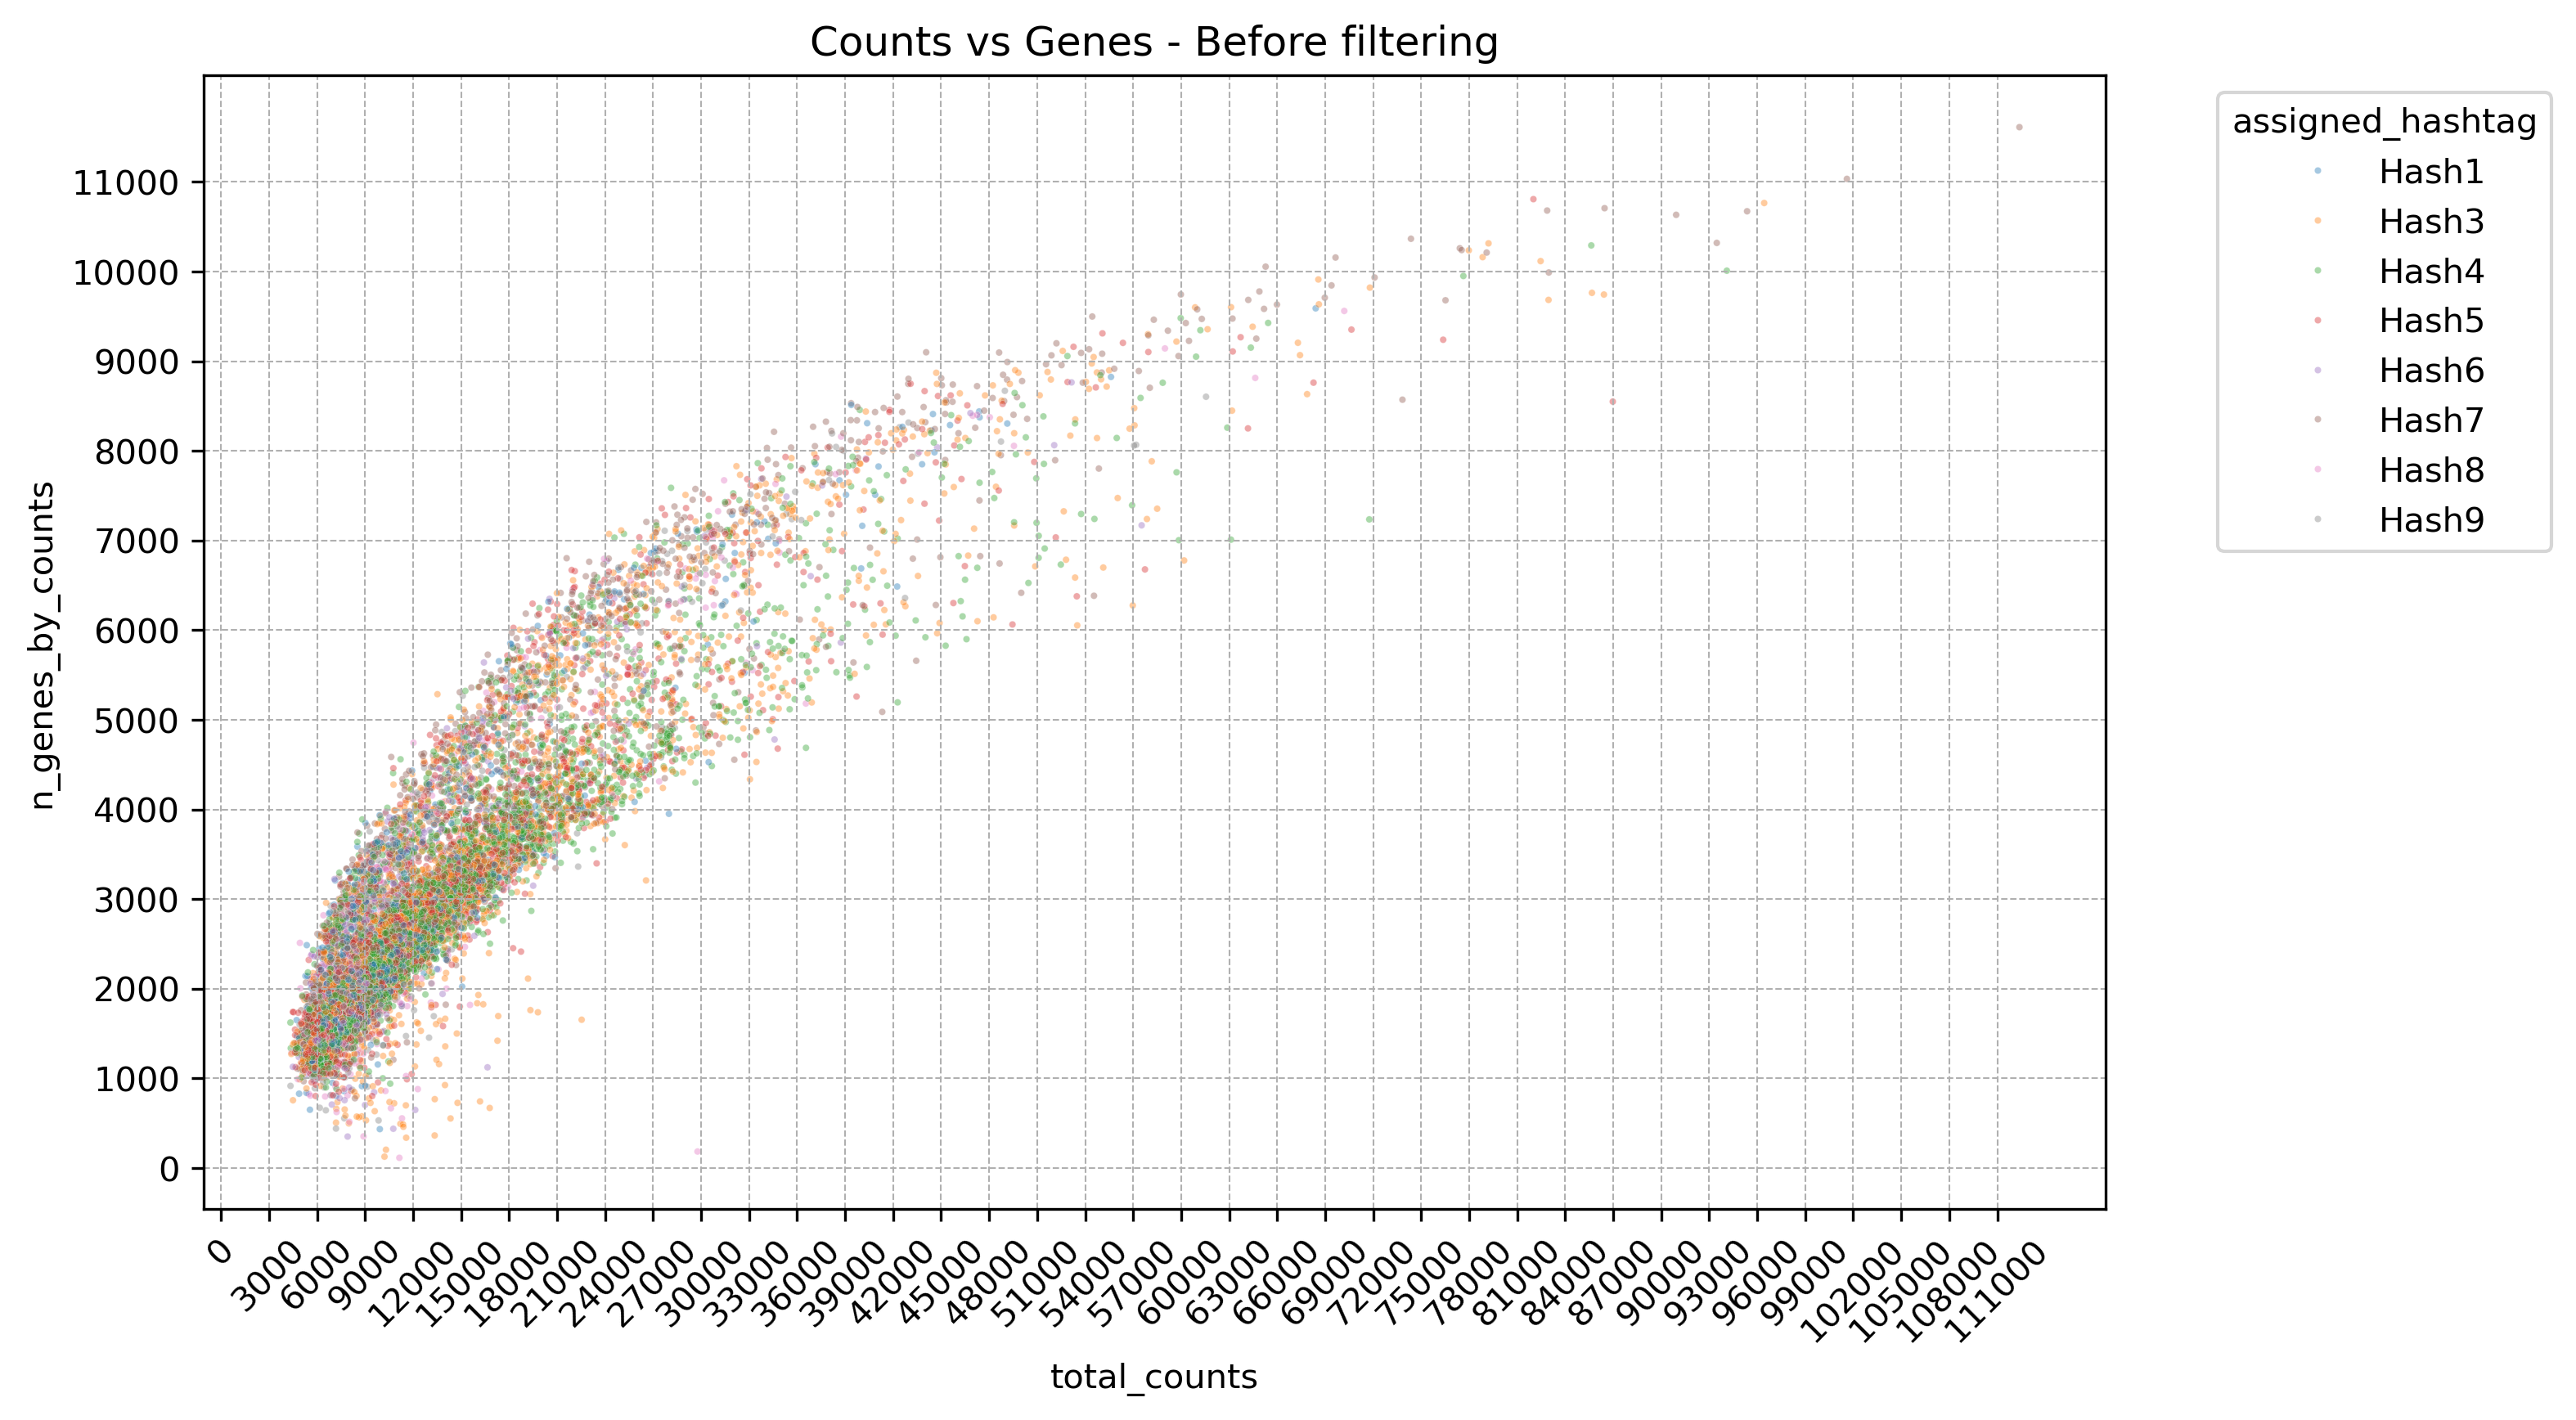

In [217]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=raw_adata.obs, x='total_counts', y='n_genes_by_counts' , hue ='assigned_hashtag', alpha = 0.4, s=4)
plt.legend(title='assigned_hashtag', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, int(max(raw_adata.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
plt.yticks(range(0, int(max(raw_adata.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [218]:
filtered_object = raw_adata[raw_adata.obs['pct_counts_mt'] < 20]
filtered_object

View of AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'assigned_hashtag_colors'
    obsm: 'hto_counts'

# Hashsolo

1. Convert hto_counts to a DataFrame
2. Add the HTO counts DataFrame as new columns in `obs`

In [219]:
hto_df = pd.DataFrame(filtered_object.obsm['hto_counts'], index=filtered_object.obs.index)
filtered_object.obs = filtered_object.obs.join(hto_df)
filtered_object.obs.head()

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,...,pct_counts_ribo,TotalSeqB1,TotalSeqB3,TotalSeqB4,TotalSeqB5,TotalSeqB6,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11611,112387,...,0.541878,0,0,375,1,0,1546,0,0,NaN
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11034,101605,...,0.570838,0,0,0,0,2,1333,0,0,NaN
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,10765,96436,...,0.216724,1,2366,0,0,1,1,0,0,NaN
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10673,95368,...,0.613413,1,1,0,215,1,915,0,0,NaN
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,10010,94100,...,0.321998,0,0,2628,0,0,0,0,0,NaN


In [220]:
sc.external.pp.hashsolo(
    filtered_object, 
    cell_hashing_columns=['TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 
                          'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9'],
    priors= (0.01, 0.8, 0.19)) ## Default prior probabilities of [negative, singlet, doublet]

Please cite HashSolo paper:
https://www.cell.com/cell-systems/fulltext/S2405-4712(20)30195-2


In [221]:
filtered_object

AnnData object with n_obs × n_vars = 11191 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'assigned_hashtag_colors'
    obsm: 'hto_counts'

In [222]:
filtered_object.obs

,assigned_hashtag,Sample,Sample-ID,Mouse-ID,Sex,Group,Ref hashtag,Nuclei Purification Method after Hashing,n_genes_by_counts,total_counts,...,TotalSeqB7,TotalSeqB8,TotalSeqB9,Assigned_Hashtag,most_likely_hypothesis,cluster_feature,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification
TACCCATTCGAACGCT-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11611,112387,...,1546,0,0,NaN,2.0,0.0,1.321910e-12,0.000164,0.999836,Doublet
TACTCATCACCAGGAC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,11034,101605,...,1333,0,0,NaN,1.0,0.0,1.341753e-07,0.943925,0.056075,TotalSeqB7
GCTGCGATCCGCCAGA-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,10765,96436,...,1,0,0,NaN,1.0,0.0,1.557366e-08,0.959477,0.040523,TotalSeqB3
TGCCGTTCATGAATGC-1,Hash7,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16,16,99_0939,Female,noninf,TotalSeqB7,Magnetic Beads,10673,95368,...,915,0,0,NaN,2.0,0.0,7.936973e-10,0.004009,0.995991,Doublet
ATCGTTGAGGATCTAT-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,10010,94100,...,0,0,0,NaN,1.0,0.0,2.420426e-07,0.940962,0.059037,TotalSeqB4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GTGCGGTCAATCCGTC-1,Hash3,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12,12,25-2456,Male,MCMV,TotalSeqB3,Magnetic Beads,1349,5298,...,1,0,1,NaN,1.0,0.0,1.478958e-02,0.919282,0.065928,TotalSeqB3
GCCAATATCCCCTGAC-1,Hash4,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13,13,#5_DZHI_12.07.2023,Male,MCMV,TotalSeqB4,Magnetic Beads,2101,6784,...,0,0,0,NaN,1.0,0.0,1.477976e-01,0.801891,0.050312,TotalSeqB4
GTCCTATTCGCGAATC-1,Hash1,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10,10,24-2455,Male,MCMV,TotalSeqB1,Standard,2059,6612,...,0,0,0,NaN,1.0,0.0,7.111346e-02,0.927554,0.001333,TotalSeqB1
AGTGATCCAAAGGTTC-1,Hash6,20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15,15,2_1219,Female,noninf,TotalSeqB6,Standard,1421,5905,...,0,0,0,NaN,1.0,0.0,2.256328e-02,0.919731,0.057705,TotalSeqB6


In [223]:
filtered_object.obs['Classification']

TACCCATTCGAACGCT-1       Doublet
TACTCATCACCAGGAC-1    TotalSeqB7
GCTGCGATCCGCCAGA-1    TotalSeqB3
TGCCGTTCATGAATGC-1       Doublet
ATCGTTGAGGATCTAT-1    TotalSeqB4
                         ...    
GTGCGGTCAATCCGTC-1    TotalSeqB3
GCCAATATCCCCTGAC-1    TotalSeqB4
GTCCTATTCGCGAATC-1    TotalSeqB1
AGTGATCCAAAGGTTC-1    TotalSeqB6
CCACTATTCGCTCTCA-1    TotalSeqB1
Name: Classification, Length: 11191, dtype: object

In [224]:
filtered_object.obs['Classification'].value_counts()

Classification
Doublet       3005
TotalSeqB4    2597
TotalSeqB5    1833
TotalSeqB3    1720
TotalSeqB7    1072
TotalSeqB1     489
TotalSeqB6     169
TotalSeqB9     133
TotalSeqB8      92
Negative        81
Name: count, dtype: int64

In [225]:
matches = filtered_object.obs['Classification'] == filtered_object.obs['Ref hashtag']
matches

TACCCATTCGAACGCT-1    False
TACTCATCACCAGGAC-1     True
GCTGCGATCCGCCAGA-1     True
TGCCGTTCATGAATGC-1    False
ATCGTTGAGGATCTAT-1     True
                      ...  
GTGCGGTCAATCCGTC-1     True
GCCAATATCCCCTGAC-1     True
GTCCTATTCGCGAATC-1     True
AGTGATCCAAAGGTTC-1     True
CCACTATTCGCTCTCA-1     True
Length: 11191, dtype: bool

In [226]:
matches.value_counts()

True     8105
False    3086
Name: count, dtype: int64

# Doublet Check

In [227]:
doublets = filtered_object[filtered_object.obs['Classification'] == 'Doublet'].copy()
doublets

AnnData object with n_obs × n_vars = 3005 × 32293
    obs: 'assigned_hashtag', 'Sample', 'Sample-ID', 'Mouse-ID', 'Sex', 'Group', 'Ref hashtag', 'Nuclei Purification Method after Hashing', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'TotalSeqB1', 'TotalSeqB3', 'TotalSeqB4', 'TotalSeqB5', 'TotalSeqB6', 'TotalSeqB7', 'TotalSeqB8', 'TotalSeqB9', 'Assigned_Hashtag', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'assigned_hashtag_colors'
    obsm: 'hto_counts'

In [228]:
doublets.obs['Group'].value_counts()

Group
MCMV      1842
noninf    1163
Name: count, dtype: int64

In [229]:
doublets.obs['Sample'].value_counts()

Sample
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_12    669
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_13    534
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_11    338
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_16    324
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_14    319
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_17    302
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_10    301
20241028_AC_Pkp2-MCMV_Mouse_Multiplex_Heart_15    218
Name: count, dtype: int64

In [230]:
doublets.obs['Nuclei Purification Method after Hashing'].value_counts()

Nuclei Purification Method after Hashing
Magnetic Beads    1846
Standard          1159
Name: count, dtype: int64